# Presentación
"Trabajo Practico - Programación 1 - TUIA"

Comision 4 - Grupo 10

**Integrantes**:


*   Lo Menzo, Alejo
*   Gómez, María Florencia

*   Ferrero, Santiago
*   Capoulat, Joaquin






# Problema

A traves del procesamiento de datos, recolactado de un archivo CSV, en lenguaje de programacion Python trataremos de responder a las siguientes preguntas

¿Cuál es el promedio de cantidad mínima y máxima de noches de hospedaje en cada barrio?

¿Cuál es el precio promedio de alquiler en cada barrio?

¿Qué tipo de propiedades(Casa, Departamento, Hotel) predominan en cada barrio?

¿Cuántas propiedades hay en alquiler en cada barrio?


# Estructura(s) de Dato(s)

# Carga de Datos y Lectura de Archivos
La Funcion Lectura y Carga recibe como parametro el Archivo Csv importado anteriormente. Al recorrer el objeto Reader se le asigna a cada fila un numero y se crea una lista con los datos de la fila 0 (titulos de cada columna).
A partir de la fila 1 se crea un diccionario que contiene todos los datos de las propiedades en alquiler. La clave es el ID de cada propiedad y el valor es otro diccionario en el cual su clave es la etiqueta y su valor en dicha columna





In [ ]:
import csv

#librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# estructura de listado
# listado={clave_mayor : {etiqueta : valor}, otra_clave : {etiqueta2 : valor2 }}
def lectura_y_carga(nombre_archivo):
  listado = {}
  with open(nombre_archivo) as Archivo:
    reader = csv.reader(Archivo,delimiter=',')
    #reader contiene la información de todo el archivo, podemos pensarlo
    #organizado en filas y columnas
   
    for num_fila, fila in enumerate(reader):
      if(num_fila==0): #si num_fila es 0 contiene las etiquetas de cada columna
        etiquetas=[]
        for columna in fila:
          etiquetas.append(columna)
      else: #si la num_fila >=1 contiene los datos para llenar el diccionario
        for num_col, valor in enumerate(fila): #recorro la fila por columnas
          if(num_col ==0): #en num_col 0 está la clave del dicc mayor
            clave_mayor = valor
            listado[clave_mayor] = {}
          else: #en num_col >=1 están los datos para llenar los diccionarios 
                #internos
            listado[clave_mayor][etiquetas[num_col]] = valor
  return listado

#Funcion para Listar los Barrios
Devuelve una lista que contiene todos los barrios de Madrid. La utilizamos como parametro para las demas funciones.


In [ ]:
def listar_barrios(diccionario):
  i=0
  barrios=[]
  for etiqueta in diccionario.values():
    if etiqueta['neighbourhood_group'] not in barrios:
      barrios.append(etiqueta['neighbourhood_group'])
      i=i+1
  #print(barrios)
  print(i)
  return barrios

# 1er Pregunta
**¿Cuál es la cantidad promedio de noches de hospedaje en cada barrio?**


Se crea una función que recibe el diccinario obtenido de la función lectura_y_carga y la lista de Barrios. Se necesita crear un diccionario (noche_promedio) donde cada clave sea un string con el nombre del barrio y el valor sea una lista.



In [ ]:
def promedio_noches(diccionario ,barrios):
    noche_promedio={}
    for barrio in barrios:
      promedio=0
      contador=0
      for etiqueta in diccionario.values():
          if (etiqueta['neighbourhood_group']==barrio):
            promedio=promedio + int(etiqueta["minimum_nights"])
            contador=contador+1
            noche_promedio[barrio]= float(promedio/contador) 
    return noche_promedio




# 2da Pregunta
**¿Cuántas propiedades hay en alquiler en cada barrio?**

Se crea una función llamada cantidad_por_barrio que recibe el diccinario obtenido de la función lectura_y_carga y la lista de Barrios. 

In [ ]:
def cantidad_por_barrio(diccionario ,barrios):
    cantidad_para_alquilar={}
    for barrio in barrios:
      contador=0
      for etiqueta in diccionario.values():
          if (etiqueta['neighbourhood_group']==barrio):
            contador=contador+1
      cantidad_para_alquilar[barrio] = contador
    print(cantidad_para_alquilar)
    return cantidad_para_alquilar

# 3er Pregunta
¿Cuál es el precio promedio de alquiler en cada barrio?

In [ ]:
def promedio_precio(diccionario ,barrios):
    precios_promedio={}
    for barrio in barrios:
      promedio=0
      contador=0
      for etiqueta in diccionario.values():
          if (etiqueta['neighbourhood_group']==barrio):
            promedio=promedio + int(etiqueta["price"])
            contador=contador+1
            precios_promedio[barrio]= int(promedio/contador) 
    print(precios_promedio)
    return precios_promedio

# 4ta Pregunta
¿Qué tipo de propiedades(Casa, Departamento, Hotel) predominan en cada barrio?

In [ ]:
def tipo_propiedad(diccionario ,barrios):
    tipo_propiedades={}
    tipos=[]

    for fila in diccionario.values():
      
      barrio = fila["neighbourhood_group"]
      
      if barrio not in tipo_propiedades:
        tipo_propiedades[barrio] = {
            "Private room": 0,
            "Entire home/apt": 0,
            "Shared room": 0,
            "Hotel room": 0
        }
      
      tipo_propiedades[barrio][fila['room_type']] += 1

            
    return tipo_propiedades

#Función para Gráficos de Barra
Creamos una funcion que nos sirva para todos los gráficos de barra. El primer parámetro "datos" recibe un diccionario cuyas claves son el eje X y sus valores el eje Y. "titulo" recibe un String. Xlabel y Ylabel obtienen cadenas de texto que se asignaran a los titulos del eje X y el eje Y respectivamente.

In [ ]:
def grafico_barras(datos, titulo, xlabel, ylabel):
  
  plt.figure(figsize = (18,10))
  plt.xticks(rotation = 90,fontsize=15)
  plt.xlabel(xlabel,fontsize=10) #indica qué representa el eje x
  plt.ylabel(ylabel,fontsize=10) #indica qué representa el eje y
  plt.title(titulo,fontsize=20)
  plt.bar(datos.keys(), datos.values())

#Función para Gráfico de Torta
Creamos una funcion que nos sirva para todos los gráficos de torta. Los parámetros que recibe son una string como titulo, la variable barrio que contiene una lista y todos los valores del diccionario noches que contienen la cantidad de noches.

In [ ]:
def grafico_torta(titulo, etiquetas, porcentajes):
  plt.figure(figsize = (15,6))
  plt.title(titulo,fontsize=25) #titulo del gráfico y tamaño de la fuente
  plt.pie(porcentajes, labels  = etiquetas, autopct="%0.1f %%") #autopct="%0.1f %%" hace que aparezcan los porcentajes dentro de cada parte de la torta
  #podemos setear todo lo que querramos como antes, tamaños de fuentes, título, etc.


# Principal
Ejercutamos la función principal que contiene las llamadas a todas las funciones del programa.

21
{'Chamartín': 541, 'Latina': 538, 'Arganzuela': 1032, 'Centro': 8584, 'Salamanca': 1330, 'Tetuán': 899, 'Chamberí': 1210, 'Barajas': 152, 'Usera': 328, 'Retiro': 683, 'Carabanchel': 685, 'Fuencarral - El Pardo': 349, 'Ciudad Lineal': 577, 'Puente de Vallecas': 520, 'Villaverde': 214, 'Hortaleza': 385, 'Villa de Vallecas': 86, 'San Blas - Canillejas': 443, 'Moncloa - Aravaca': 637, 'Moratalaz': 125, 'Vicálvaro': 128}
{'Chamartín': 137, 'Latina': 105, 'Arganzuela': 118, 'Centro': 137, 'Salamanca': 168, 'Tetuán': 107, 'Chamberí': 130, 'Barajas': 129, 'Usera': 74, 'Retiro': 127, 'Carabanchel': 85, 'Fuencarral - El Pardo': 135, 'Ciudad Lineal': 124, 'Puente de Vallecas': 110, 'Villaverde': 78, 'Hortaleza': 139, 'Villa de Vallecas': 75, 'San Blas - Canillejas': 332, 'Moncloa - Aravaca': 137, 'Moratalaz': 86, 'Vicálvaro': 219}


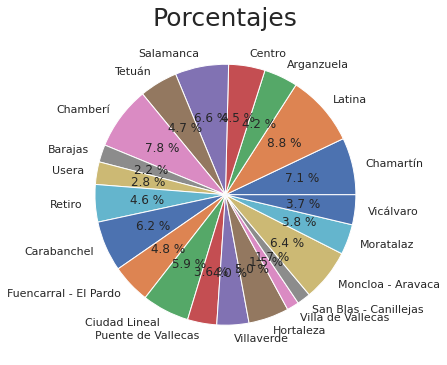

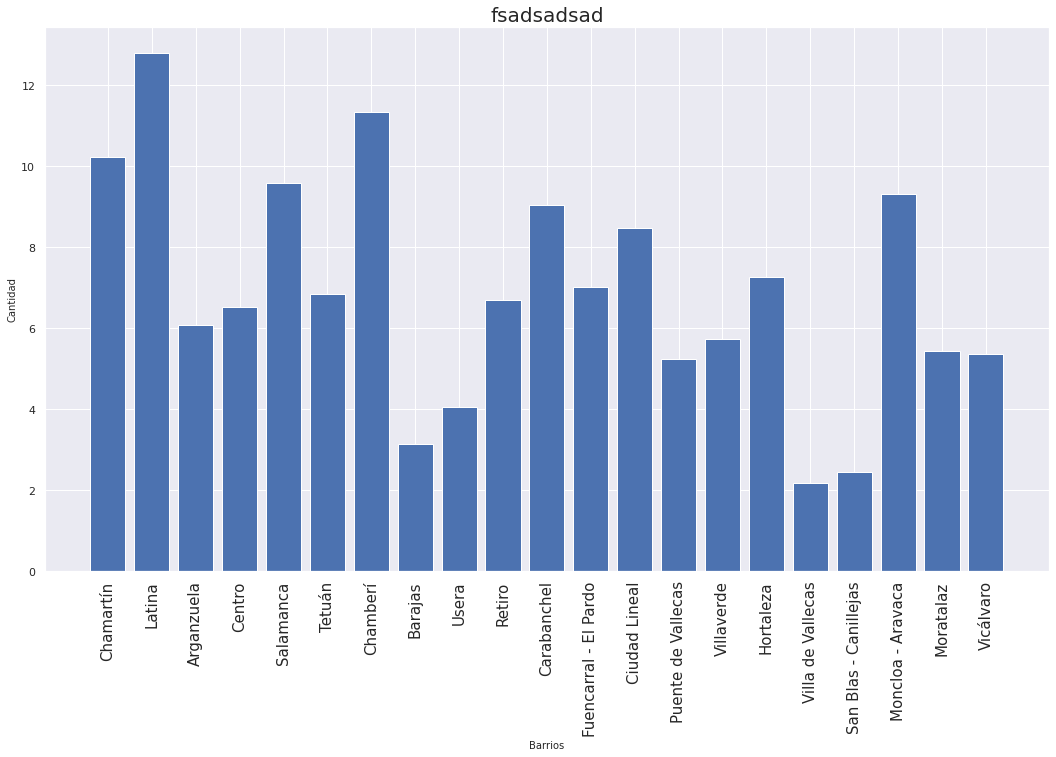

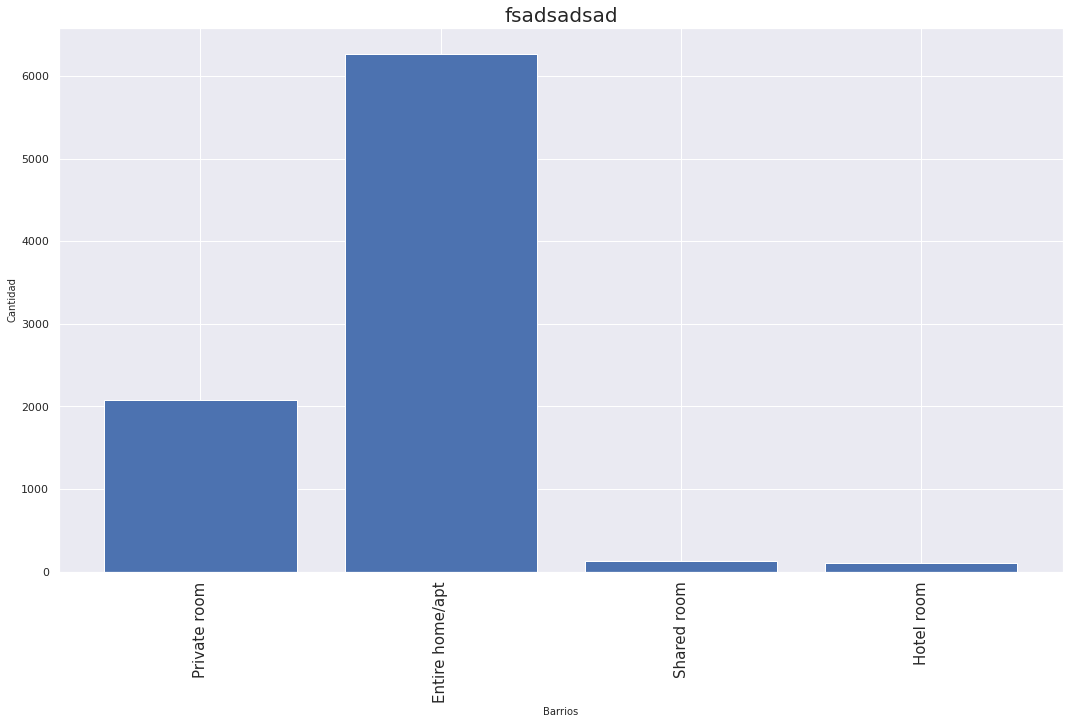

In [ ]:
def principal():

    dic = lectura_y_carga('listings.csv')
    barrios = listar_barrios(dic)
    noche = promedio_noches(dic, barrios)
    cantidad_por_barrio(dic, barrios)
    promedio_precio(dic, barrios)
    tipo = tipo_propiedad(dic,barrios)
    
    grafico_torta("Promedio noches",barrios, noche.values())
    grafico_barras(noche,"Promedio noches", "Barrios", "Cantidad")
    grafico_barras(tipo["Centro"],"Propiedad predominante", "Barrios", "Cantidad")
    


principal()